In [15]:
%matplotlib inline
import thinkstats2
import thinkplot
import numpy as np
import pandas as pd
import hinc
import hinc2
import math

hinc.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[0][0] -= 1
hinc2.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.log_lower[0] = 3.0
hinc2.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.log_upper[41] = log_upper
/Users/nathankiner/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


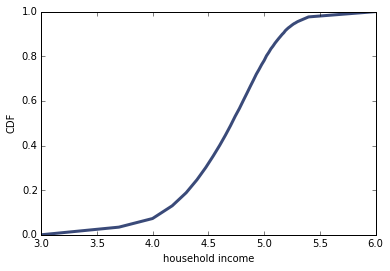

In [2]:
hinc2.main()

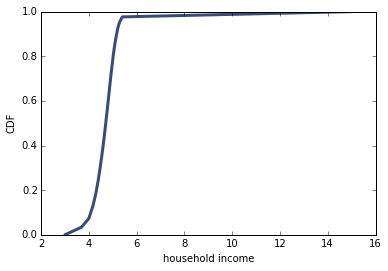

In [45]:
df = hinc.ReadData()
log_sample = hinc2.InterpolateSample(df, log_upper=15.0)

log_cdf = thinkstats2.Cdf(log_sample)
log_pdf = thinkstats2.EstimatedPdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Show(xlabel='household income',
               ylabel='CDF')

In [46]:
ls = pd.Series(log_sample)

In [47]:
print ls.mean()
print ls.median()

4.76455710567
4.70949835561


In [48]:
def Mean(sample):
    if len(sample) == 0:
        raise ValueError("No elements in this list.")
    mean = sum(sample)/len(sample)
    return mean

def Median(sample):
    if len(sample) == 0:
        raise ValueError("No elements in this list.")
    sorted_sample = sorted(sample)
    l = len(sorted_sample)
    if l % 2 == 0:
        median = (sorted_sample[l/2 - 1] + sorted_sample[l/2])/2
    else:
        median = sorted_sample[abs(l/2)]
    return median

def Std(sample):
    if len(sample) == 0:
        raise ValueError("No elements in this list.")
    mean = Mean(sample)
    var = 0
    for xi in sample:
        var += pow(xi - mean, 2)
    var = var/len(sample)
    std = math.sqrt(var)
    return std
    
def PearsonSkewness(sample):
    if len(sample) == 0:
        raise ValueError("No elements in this list.")
    return 3*(Mean(sample) - Median(sample))/Std(sample)

In [49]:
print PearsonSkewness(log_sample)

0.158417828469
